# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Choose and motivate for an appropriate likelihood function for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use a conjugate prior distribution for your likelihood function.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import beta
import scipy.stats as sts
from scipy.stats import binom
import seaborn as sns

### 1. Since this is a likelihood function of patients who improved VS those who didn't, a binomial distribution will be the most appropriate to model this type of data.

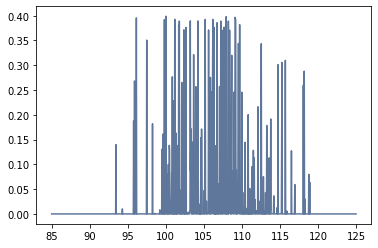

In [58]:
n = 144 #number of patients
p = 107/144 #likelihood of success
likelihood = binom.rvs(n, p, size=1000)

x = np.linspace(85, 125, 1000)

plt.plot(x, sts.norm.pdf(x, likelihood))

plt.show()

### 2. I chose the beta distribution because we know that a beta prior is conjugate to the binomial likelihood, and therefore, the posterior will be a beta distribution as well.

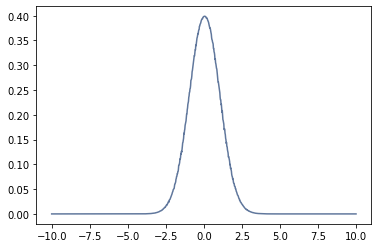

In [72]:
prior = beta.rvs(10, 10, size=1000)  

x = np.linspace(-10, 10, 1000)

area = sp.integrate.trapz(prior, x)

normalized_prior = prior/area

plt.plot(x, sts.norm.pdf(x, normalized_prior))

plt.show()

I chose the values of 10 and 10 for $\alpha$ and $\beta$ because I believe that the specific allergen immunotherapy (SIT) method has a 50/50 chance of successful curing eczema, based on previous knowledge and experiences when it comes to new medical trials. Therefore, $\alpha$ and $\beta$ is the same cause there's no bias to any of the sides (more success, less success).

### 3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. 

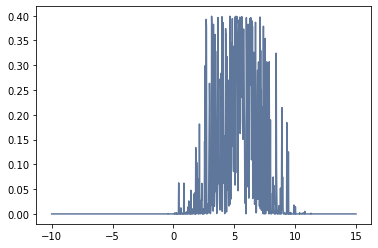

In [74]:
posterior = normalized_prior * likelihood

x = np.linspace(-10, 15, 1000)

plt.plot(x, sts.norm.pdf(x, posterior))


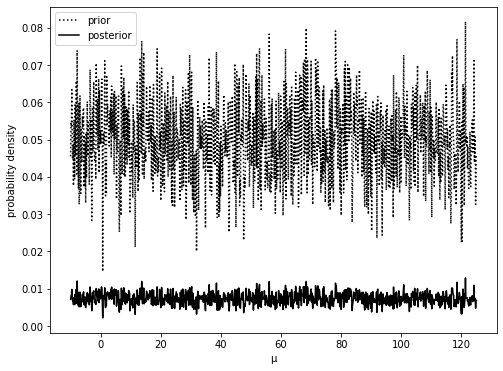

In [63]:
posterior = normalized_prior * likelihood

x = np.linspace(-10, 125, 1000) #posterior should be somewhere in between prior and likelihood

area = sp.integrate.trapz(posterior, x)

normalized_posterior = posterior / area

plt.figure(figsize=(8, 6))
plt.plot(x, normalized_prior, color='black', linestyle=':', label='prior')
plt.plot(x, normalized_posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

Okay, I definitely did something wrong here...

But I think we can calculate the posterior manually with the formula that was given to us in the video.

Right now, we have the following information:

$N = 144$

$x = 107$

Prior beta: $\beta(10, 10)$

Therefore, our posterior should be $\beta(10+107, 10+144-107)$ =  $\beta(117, 47)$

If we plot that as a beta distribution...

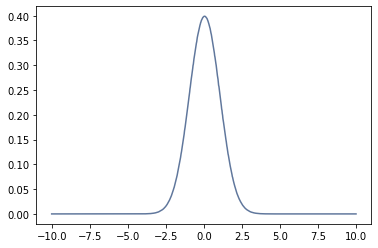

In [79]:
prior2 = beta.rvs(117, 47, size=1000)  

x = np.linspace(-10, 10, 1000)

area = sp.integrate.trapz(prior2, x)

normalized_prior2 = prior2/area

plt.plot(x, sts.norm.pdf(x, normalized_prior2))

plt.show()

I'm not sure why I got the same graph here...shouldn't it be skewed in towards the prior? :(

## Task 2: Questions, predictions, and decisions
1. Posterior predictive distribution: Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

I don't think my posterior is fit to make any predictions or answer any of these questions :/